In [2]:
from load_data_from_synpase import load_excel, load_file, load_table, syn

In [3]:
import pandas as pd
import seaborn as sns
from pybeataml.load_data import AMLData
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Welcome, James Pino!




UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.7.0) is available. Your version (2.6.0) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.7.0 release notes

https://python-docs.synapse.org/build/html/news.html



In [4]:
data = AMLData()
exp_data = data.exp_data

significant not in columns.
p_value not in columns.


In [5]:
drug_response = data.auc_table.copy()
drug_response = drug_response[data.drug_names].copy()

In [6]:
total_df = drug_response.join(exp_data.species.pivoter(index='sample_id', columns='label', values='exp_value'))
total_df.head()

,17-AAG (Tanespimycin),A-674563,ABT-737,AGI combo,AGI combo - Crizotinib,AGI combo - Quizartinib,AGI combo - Sorafenib,AGI-5198,AGI-6780,AGI-6780 - CM,...,hsa-mir-1199_rna,hsa-mir-335_rna,hsa-mir-4537_rna,hsa-mir-4538_rna,hsa-mir-4539_rna,hsa-mir-6080_rna,hsa-mir-6723_rna,hsa-mir-7162_rna,hsa-mir-8072_rna,snoU2_19_rna
sample_id,,,,,,,,,,,,,,,,,,,,,
11-00261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-00376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-00378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-00382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-00388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def plot_drug_gene(drug, gene):
    subset = total_df[[drug, gene]].dropna()
    plt.figure()
    g = sns.regplot(
        x=gene,
        y=drug,
        data=subset,
        fit_reg =True
    )
    plt.title(f"{drug} : {gene}")    
    return g

In [8]:
total_df['sens'] = total_df['Venetoclax'] < 100
total_df['sens2'] = total_df['Sorafenib'] < 100
total_df['sens3'] = total_df['Panobinostat'] < 100

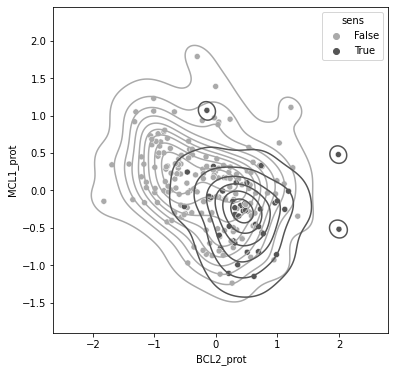

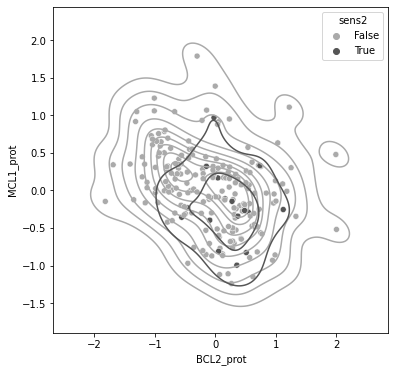

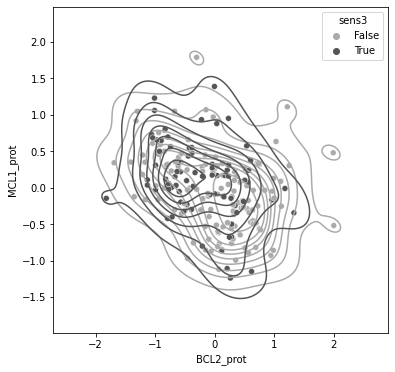

In [9]:
plt.figure(figsize=(6,6))
sns.kdeplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
sns.scatterplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
plt.figure(figsize=(6,6))
sns.kdeplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens2',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
sns.scatterplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens2',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
plt.figure(figsize=(6,6))
sns.kdeplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens3',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
sns.scatterplot(
    x='BCL2_prot',
    y='MCL1_prot', 
    hue='sens3',
    data=total_df,
    palette='binary',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);

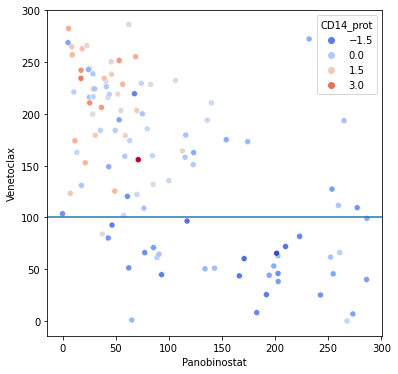

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x='Panobinostat',
    y='Venetoclax', 
    hue='CD14_prot',
    data=total_df,
    palette='coolwarm',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
plt.axhline(100);

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x='BCL2_prot',
    y='Venetoclax', 
    hue='MCL1_prot',
    data=total_df,
    palette='coolwarm',
#     color=sns.color_palette('coolwarm', 5), 
#     hue_norm=(0, 300)
);
plt.axhline(100);

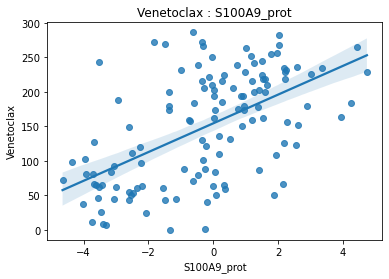

In [12]:
plot_drug_gene('Venetoclax', 'S100A9_prot');

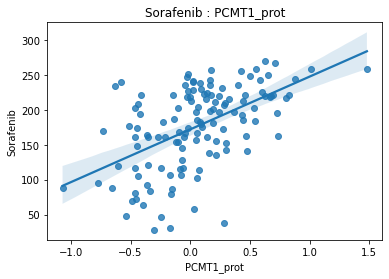

In [22]:
plot_drug_gene('Sorafenib', 'PCMT1_prot');

In [ ]:
plot_drug_gene('Venetoclax', 'BCL2_prot');
plot_drug_gene('BCL2_prot', 'MCL1_prot');

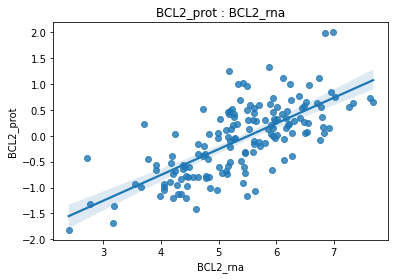

In [53]:
plot_drug_gene('BCL2_prot', 'BCL2_rna');

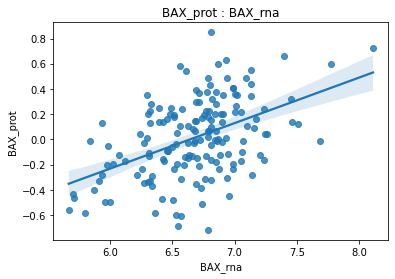

In [54]:
plot_drug_gene('BAX_prot', 'BAX_rna');

In [ ]:
plot_drug_gene('BCL2L11_rna', 'Venetoclax');

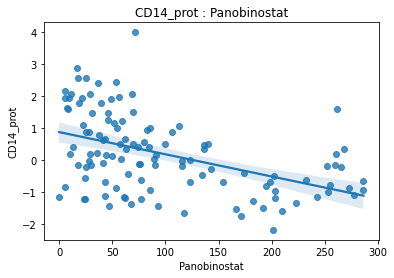

In [8]:
plot_drug_gene('CD14_prot', 'Panobinostat');

In [ ]:
plot_drug_gene('CD14_prot', 'Venetoclax');

In [9]:
plot_drug_gene('CD14_prot', 'Panobinostat');

KeyError: "['CHST15_prot'] not in index"

In [14]:
bcl2_proteins = [
    'BAX',
    'BAK1',
    'BAD',
    'BCL2L11', #BIM
    
    'BCL2',
    'MCL1',
    'BCL2L1', #BCL-XL
    'BCL2L2', # BCL-W
    'BCL2A1',
    
#     'CYP3A4'
]

In [67]:
other_proteins = [
    'DPM3',
    'CD34',
    'CD33',
]

In [55]:
mito = [i for i in exp_data.species.identifier.unique() if i.startswith('COX')]

In [15]:
bcl2_subset = exp_data.species.subset(bcl2_proteins)





bcl2_fam_protein = bcl2_subset.loc[~bcl2_subset.label.str.endswith('_rna')]
bcl2_pivot_protein = bcl2_fam_protein.pivoter(index='sample_id', columns='label', values='exp_value')
joined_protein = bcl2_pivot_protein.join(data.auc_table[['Venetoclax', 'Panobinostat']])
corr_matrix_protein = joined_protein.corr(method='spearman')


bcl2_fam_rna = bcl2_subset.loc[bcl2_subset.label.str.endswith('_rna')]
bcl2_pivot_rna = bcl2_fam_rna.pivoter(index='sample_id', columns='label', values='exp_value')
joined_rna = bcl2_pivot_rna.join(data.auc_table[['Venetoclax', 'Panobinostat']])
corr_matrix_rna = joined_rna.corr(method='spearman')

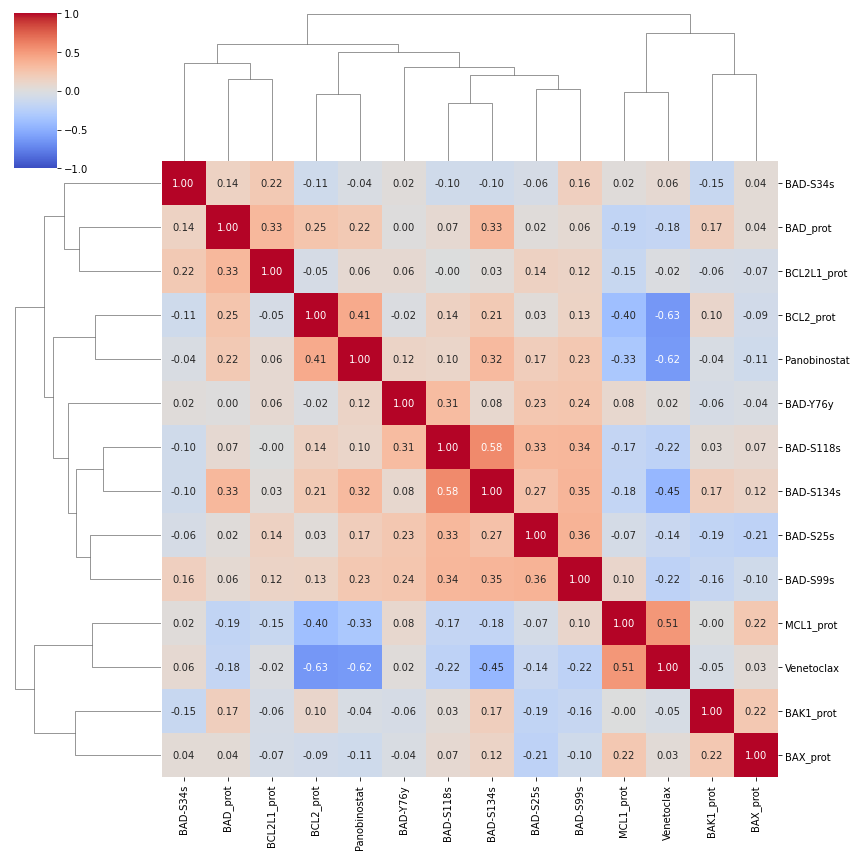

In [16]:
sns.clustermap(
    corr_matrix_protein, 
    cmap='coolwarm',
    annot=True, 
    fmt='.2f', 
    vmin=-1, 
    vmax=1,
#     method='complete',
#     metric='correlation', 
    figsize=(12,12)
);

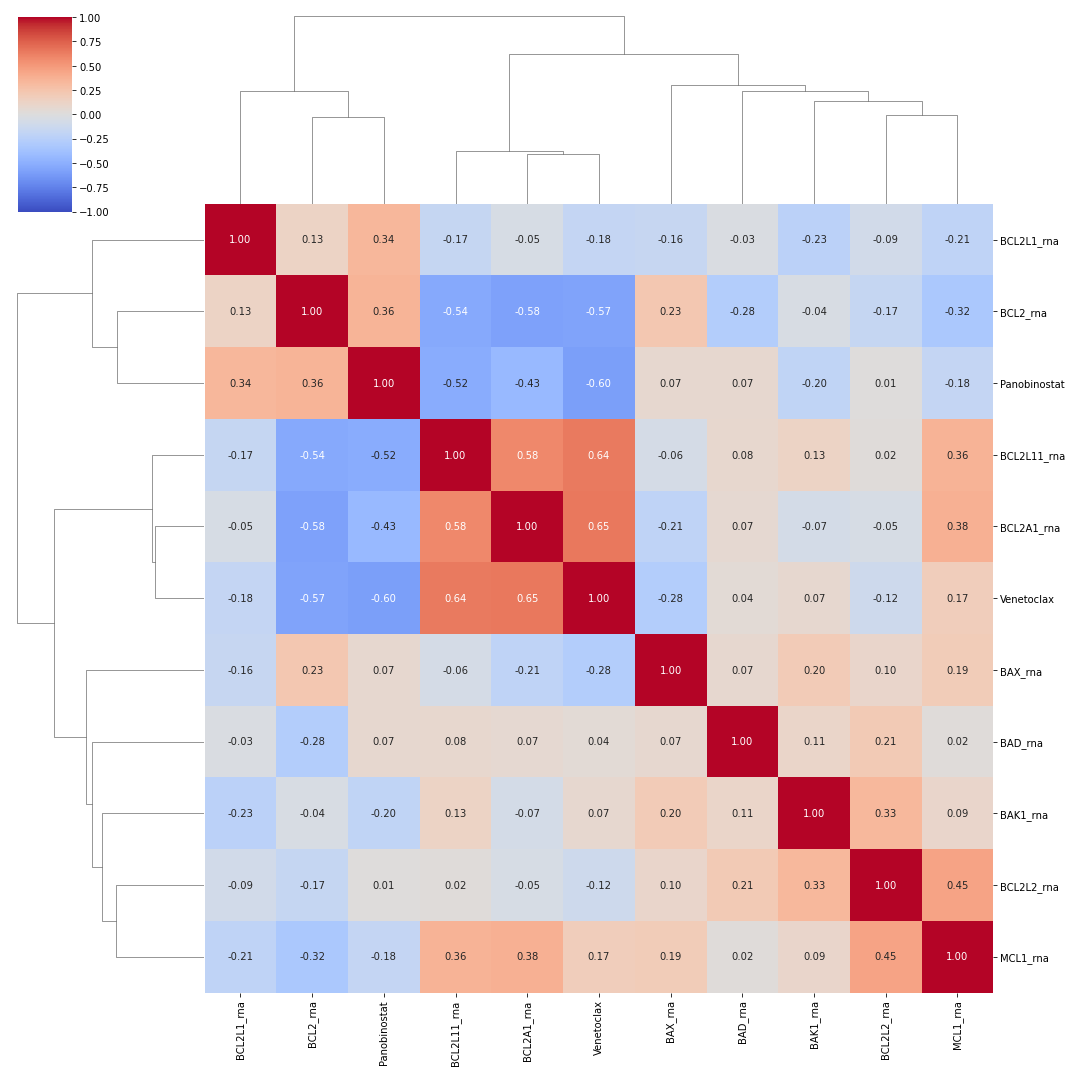

In [17]:
# plt.figure(figsize=(20, 20))
sns.clustermap(
    corr_matrix_rna, 
    cmap='coolwarm',
    annot=True, 
    fmt='.2f', 
    vmin=-1, 
    vmax=1,
#     method='complete',
#     metric='correlation', 
    figsize=(15,15)
);

15-00742     grey
16-01004    black
15-00653    black
16-00844     grey
16-00035    black
            ...  
17-00322    black
15-00571     grey
17-00649    black
15-00377     grey
16-00479    black
Name: Cluster, Length: 127, dtype: object

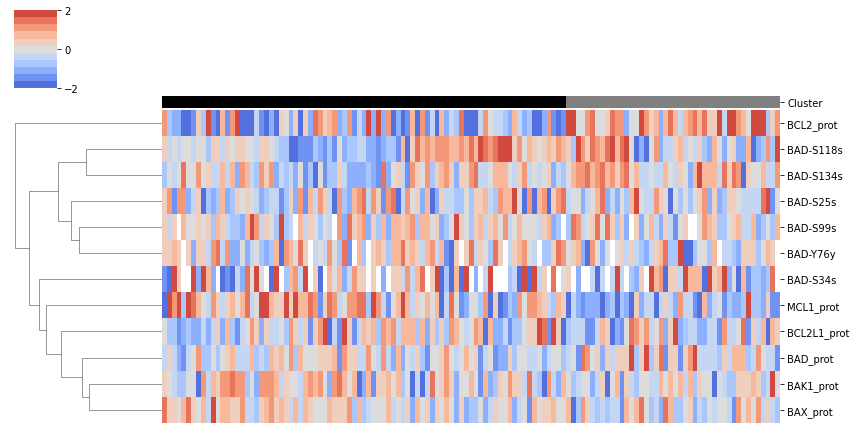

In [20]:
reference = joined_protein[~(joined_protein.Venetoclax.isnull())].copy()
reference['sens'] = reference.Venetoclax < 100
reference['sens']
col_labels = reference.sens
col_labels.dropna(inplace=True)
col_map_colors = dict(zip(sorted(col_labels.unique()), ['black', 'grey']))

col_colors = pd.Series(col_labels, index=reference.index.values, name='Cluster').map(col_map_colors)
col_colors
subset = bcl2_pivot_protein.loc[col_colors.index]
subset = subset.join(reference['sens']).sort_values('sens')
del[subset['sens']]
sns.clustermap(
    subset.fillna(0).T,
    mask=subset.isna().T,
    z_score=1,
    cmap=sns.color_palette('coolwarm', 11),
    method='ward',
#     metric='correlation', 
#     linewidths=0.001,
    xticklabels=False,
    yticklabels=True,
    col_colors=col_colors,
    vmax=2,
    vmin=-2,
    figsize=(12, 6),
    row_cluster=True,
    col_cluster=False,
)

plt.savefig("bcl2_family_protein_heatmap.png", bbox_inches='tight', dpi=300)
plt.savefig("bcl2_family_protein_heatmap.pdf", bbox_inches='tight', dpi=300)

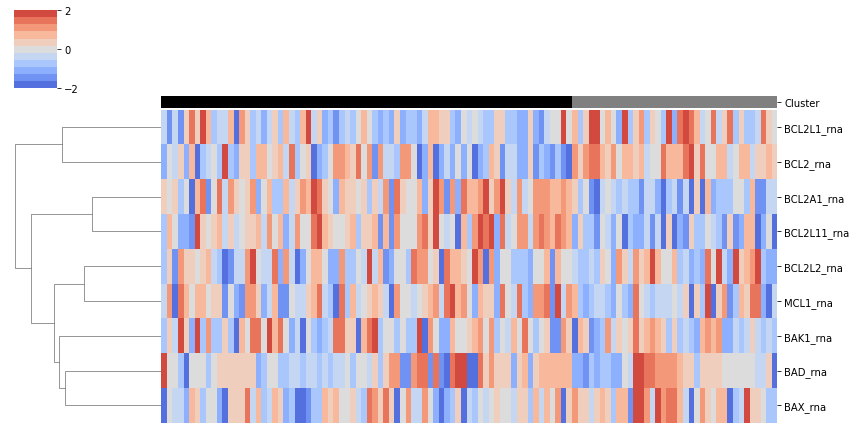

In [169]:
reference = joined_rna[~(joined_rna.Venetoclax.isnull())].copy()
reference['sens'] = reference.Venetoclax < 100
reference['sens']
col_labels = reference.sens
col_labels.dropna(inplace=True)
col_map_colors = dict(zip(sorted(col_labels.unique()), ['black', 'grey']))

col_colors = pd.Series(col_labels, index=reference.index.values, name='Cluster').map(col_map_colors)
col_colors


subset = bcl2_pivot_rna.loc[col_colors.index]
subset = subset.join(reference['sens']).sort_values('sens')
del[subset['sens']]
sns.clustermap(
    subset.fillna(0).T,
    mask=subset.isna().T,
    z_score=0,
    cmap=sns.color_palette('coolwarm', 11),
    method='ward',
#     metric='correlation', 
#     linewidths=0.001,
    yticklabels=True,
    xticklabels=False,
    col_colors=col_colors,
    vmax=2,
    vmin=-2,
    figsize=(12, 6),
    row_cluster=True,
    col_cluster=False,
)

plt.savefig("bcl2_family_rna_heatmap.png", bbox_inches='tight', dpi=300)
plt.savefig("bcl2_family_rna_heatmap.pdf", bbox_inches='tight', dpi=300)

In [22]:
from magine.networks.subgraphs import Subgraph

2022-09-29 11:57:13.441 - magine - INFO - Logging started on MAGINE version 0.1.5
2022-09-29 11:57:13.441 - magine - INFO - Log entry time offset from UTC: -4.00 hours


In [23]:
import networkx as nx
g = nx.read_gpickle('background_network.p.gz')

In [24]:
from magine.networks.visualization.notebooks import view
from magine.networks.subgraphs import Subgraph

In [25]:
sg = Subgraph(g)

In [26]:
hdac_bcl2 = sg.paths_between_list(['HDAC1', 'BCL2'])

In [27]:
view.draw_cyjs(hdac_bcl2, layout='dagre')

In [35]:
nx.write_gml(hdac_bcl2, 'hdac_bcl2.gml')

In [28]:
subset = exp_data.proteomics.subset(list(hdac_bcl2.nodes))
subset_pivot = subset.pivoter(index='sample_id', columns='label', values='exp_value')
subset_pivot.head()

label,BCL2_prot,CEBPA_prot,HDAC1_prot,NCOA3_prot,RELA_prot,SUMO1_prot
sample_id,,,,,,
18-00007,2.00,0.305,0.06970,0.03590,-0.208,0.0683
16-00289,1.99,1.060,-0.18000,0.87500,0.271,-0.2780
16-00351,1.33,1.170,-0.57500,1.03000,0.512,-0.3850
17-00775,1.25,-1.260,-0.07690,0.00824,0.606,0.2410
11-00388,1.22,1.230,0.00177,0.22600,-0.201,-0.0395


In [29]:
subset_pivot = subset_pivot.join(total_df['sens']).sort_values('sens')
del[subset_pivot['sens']]

In [19]:
subset = exp_data.proteomics.subset(list(hdac_bcl2.nodes))
subset_pivot = subset.pivoter(index='sample_id', columns='label', values='exp_value')
subset_pivot = subset_pivot.join(total_df['sens']).sort_values('sens')
del[subset_pivot['sens']]
sns.clustermap(
    subset_pivot.fillna(0).T,
    mask=subset_pivot.isna().T,
    z_score=1,
    cmap=sns.color_palette('coolwarm', 21),
    method='ward',
    metric='correlation', 
#     linewidths=0.001,
    yticklabels=True,
    col_colors=node_colors,
    vmax=3,
    vmin=-3,
    figsize=(12, 6),
    row_cluster=True,
    col_cluster=True,
)

NameError: name 'hdac_bcl2' is not defined

In [31]:
# add color for in feature set(s)
mek_bcl2 = sg.paths_between_list(['MAP2K1', 'BCL2'])
view.draw_cyjs(mek_bcl2, layout='dagre')

In [34]:
nx.write_gml(mek_bcl2, 'mek_bcl2.gml')

In [32]:
mek_hdac = sg.paths_between_list(['MAP2K1', 'HDAC1'])
view.draw_cyjs(mek_hdac, layout='cose-bilkent')

In [33]:
nx.write_gml(mek_hdac, 'mek_hdac.gml')

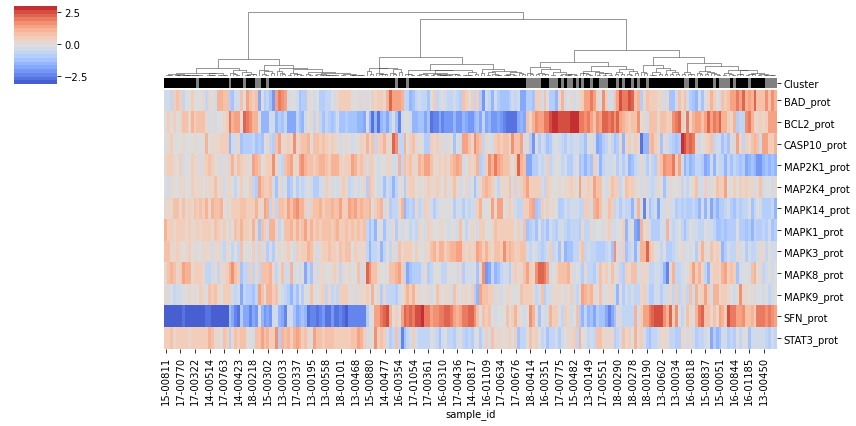

In [70]:
subset = exp_data.proteomics.subset(list(mek_bcl2.nodes))
subset_pivot = subset.pivoter(index='sample_id', columns='label', values='exp_value')
subset_pivot = subset_pivot.join(total_df['sens']).sort_values('sens')
del[subset_pivot['sens']]
sns.clustermap(
    subset_pivot.fillna(0).T,
    mask=subset_pivot.isna().T,
    z_score=1,
    cmap=sns.color_palette('coolwarm', 21),
    method='ward',
    metric='cosine', 
#     linewidths=0.001,
    yticklabels=True,
    col_colors=node_colors,
#     vmax=3,
#     vmin=-3,
    figsize=(12, 6),
    row_cluster=False,
    col_cluster=True,
)